In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

Linear regression

In [16]:
Xtrain = np.arange(0,1,0.01).reshape(-1, 1)
ytrain = 10*Xtrain + np.random.normal(0.0,1.0,100).reshape(-1, 1)
model = LinearRegression().fit(Xtrain.reshape(-1, 1), ytrain.reshape(-1, 1))
print(model.intercept_, model.coef_)


[-0.34798628] [[10.43089398]]


Plotting model predictions

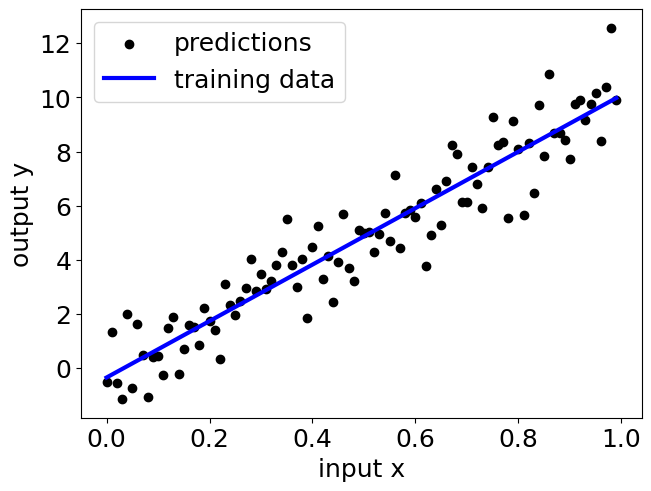

In [17]:
ypred = model.predict(Xtrain)
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(Xtrain, ytrain, color='black')
plt.plot(Xtrain, ypred, color='blue', linewidth=3)
plt.xlabel('input x'); plt.ylabel('output y')
plt.legend(['predictions','training data'])
plt.show()

Logistic regression

In [18]:
Xtrain = np.random.uniform(0,1,100)
ytrain = np.sign(Xtrain-0.5)
Xtrain = Xtrain.reshape(-1, 1)
model = LogisticRegression(penalty='none',solver='lbfgs')
model.fit(Xtrain, ytrain)
print("intercept %f, slope %f"%(model.intercept_, model.coef_))

intercept -189.288362, slope 388.468981


Plotting predictions

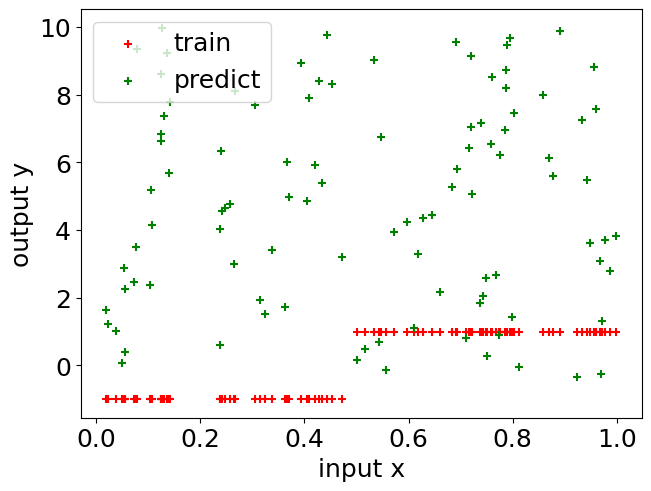

In [19]:
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.scatter(Xtrain, ypred, color='green', marker='+')
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(["train","predict"])
plt.show()

Logistic regression

In [20]:
from sklearn.svm import LinearSVC
model = LinearSVC(C=1.0).fit(Xtrain, ytrain)
print("intercept %f, slope %f"%(model.intercept_, model.coef_))

intercept -1.765727, slope 3.627792


Hold-Out Method

In [21]:
from sklearn.metrics import mean_squared_error  # Import mean_squared_error
X = np.arange(0,1,0.05).reshape(-1, 1)
y = 10*X + np.random.normal(0.0,1.0,X.size).reshape(-1, 1)
for i in range(5):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)
    model = LinearRegression().fit(Xtrain, ytrain)
    ypred = model.predict(Xtest)
    print("intercept %f, slope %f, square error %f"%(model.intercept_, model.coef_, mean_squared_error(ytest,ypred)))

intercept 0.202263, slope 9.304191, square error 0.394952
intercept 0.399719, slope 8.914990, square error 1.076242
intercept 0.749731, slope 8.630130, square error 1.573524
intercept 0.368747, slope 8.822943, square error 1.014404
intercept 0.364418, slope 9.132911, square error 0.821807


sklearnk-Fold Cross-validation

In [22]:
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(scores)
print("Accuracy: %0.2f (+/− %0.2f)" % (scores.mean(), scores.std()))
kf = KFold(n_splits=5)
for train, test in kf.split(X):
    model = LinearRegression().fit(X[train], y[train])
    ypred = model.predict(X[test]) 
    print("intercept %f, slope %f, square error %f"%(model.intercept_, model.coef_,mean_squared_error(y[test],ypred)))

[-0.74328547 -1.36398123 -0.44084608 -0.71838811 -0.38254596]
Accuracy: -0.73 (+/− 0.35)
intercept 0.537416, slope 8.692327, square error 0.743285
intercept 0.193003, slope 9.205780, square error 1.363981
intercept 0.426591, slope 8.966500, square error 0.440846
intercept 0.324146, slope 8.904048, square error 0.718388
intercept 0.309014, slope 9.173946, square error 0.382546


Tuning Model Hyperparameters

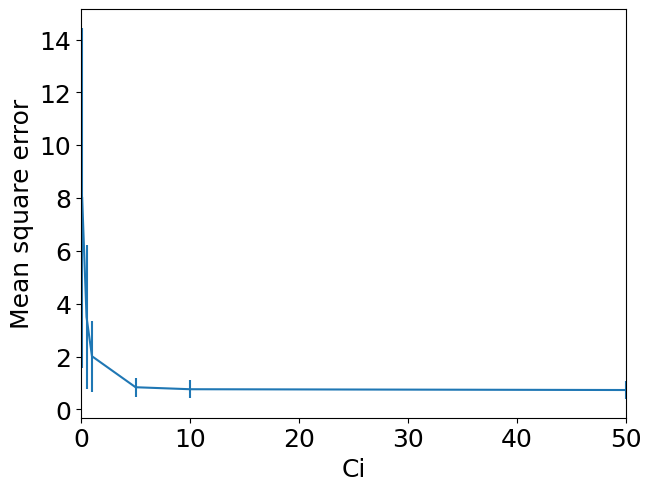

In [23]:
mean_error=[]; std_error=[]
Ci_range = [0.1, 0.5, 1, 5, 10, 50, 100]
for Ci in Ci_range:
    from sklearn.linear_model import Ridge
    model = Ridge(alpha=1/(2*Ci))
    temp=[]
    kf = KFold(n_splits=5)
    for train, test in kf.split(X):
        model.fit(X[train], y[train])
        ypred = model.predict(X[test])
        temp.append(mean_squared_error(y[test],ypred))
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())
plt.errorbar(Ci_range,mean_error,yerr=std_error)
plt.xlabel('Ci'); plt.ylabel('Mean square error')
plt.xlim((0,50))
plt.show()

Tuning Model Hyperparameters

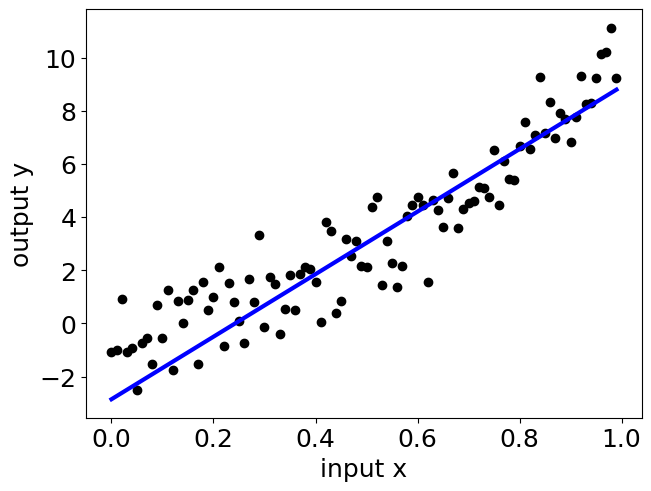

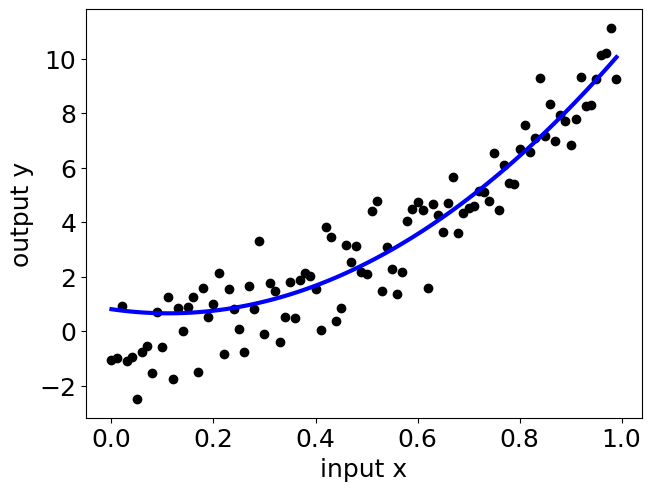

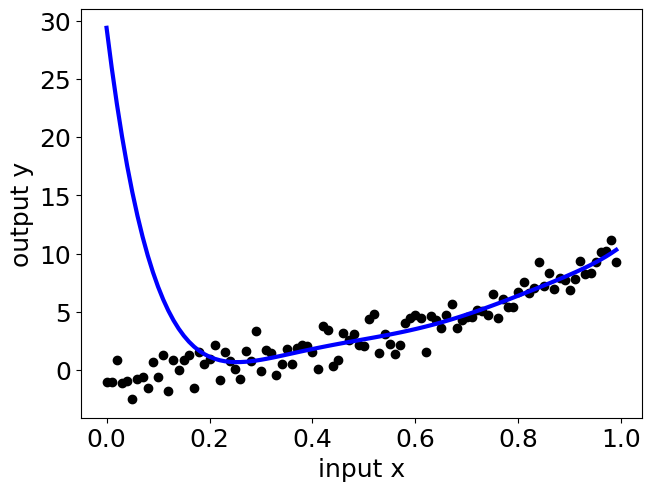

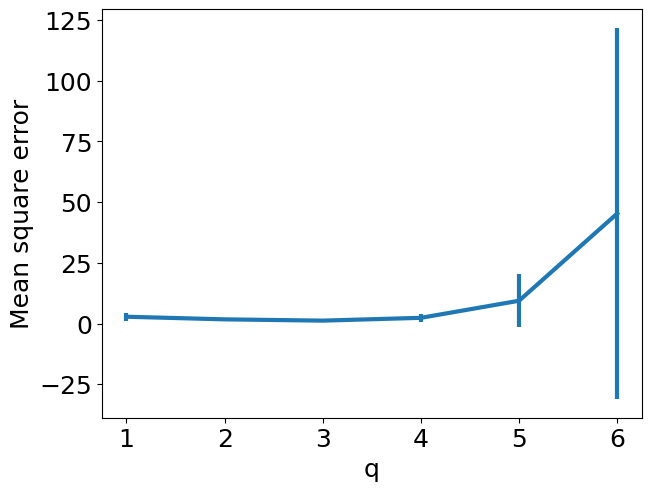

In [24]:
X = np.arange(0,1,0.01).reshape(-1, 1)
y = 10*(X**2) + np.random.normal(0.0,1.0,X.size).reshape(-1, 1)
kf = KFold(n_splits=5)
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
mean_error=[]; std_error=[]
q_range = [1,2,3,4,5,6]
for q in q_range:
    Xpoly = PolynomialFeatures(q).fit_transform(X)
    model = LinearRegression()
    temp=[]; plotted = False
    for train, test in kf.split(Xpoly):
        model.fit(Xpoly[train], y[train])
        ypred = model.predict(Xpoly[test])
        temp.append(mean_squared_error(y[test],ypred))
        if ((q==1) or (q==2) or (q==6)) and not plotted:
            plt.scatter(X, y, color='black')
            ypred = model.predict(Xpoly)
            plt.plot(X, ypred, color='blue', linewidth=3)
            plt.xlabel("input x"); plt.ylabel("output y")
            plt.show()
            plotted = True
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())
plt.errorbar(q_range,mean_error,yerr=std_error,linewidth=3)
plt.xlabel('q')
plt.ylabel('Mean square error')
plt.show()

Python Code For Baseline Predictor Gaussian Noise Example

square error 1.333133 0.883753


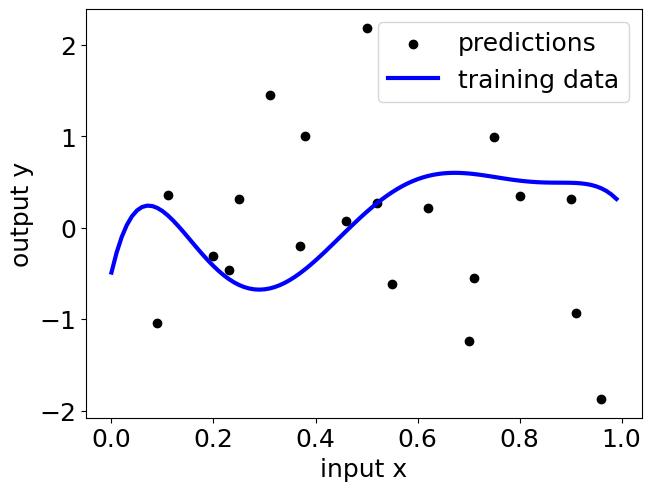

In [25]:
X = np.arange(0,1,0.01).reshape(-1, 1)
y = np.random.normal(0.0,1.0,X.size).reshape(-1, 1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

Xtrain_poly = PolynomialFeatures(6).fit_transform(Xtrain)
Xtest_poly = PolynomialFeatures(6).fit_transform(Xtest)
X_poly = PolynomialFeatures(6).fit_transform(X)

model = LinearRegression().fit(Xtrain_poly, ytrain)

ypred = model.predict(Xtest_poly)

from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy="mean").fit(Xtrain_poly, ytrain)
ydummy = dummy.predict(Xtest_poly)

print("square error %f %f"%(mean_squared_error(ytest,ypred),mean_squared_error(ytest,ydummy)))

plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(Xtest, ytest, color='black')
ypred = model.predict(X_poly)
plt.plot(X, ypred, color='blue', linewidth=3)
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(["predictions","training data"])
plt.show()

Movie Review Example

Confusion Matrix for LinearSVC:
[[6 4]
 [6 4]]
Classification Report for LinearSVC:
              precision    recall  f1-score   support

           0       0.50      0.60      0.55        10
           1       0.50      0.40      0.44        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.49        20
weighted avg       0.50      0.50      0.49        20

Confusion Matrix for DummyClassifier:
[[10  0]
 [10  0]]
Classification Report for DummyClassifier:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        10
           1       1.00      0.00      0.00        10

    accuracy                           0.50        20
   macro avg       0.75      0.50      0.33        20
weighted avg       0.75      0.50      0.33        20



c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, in

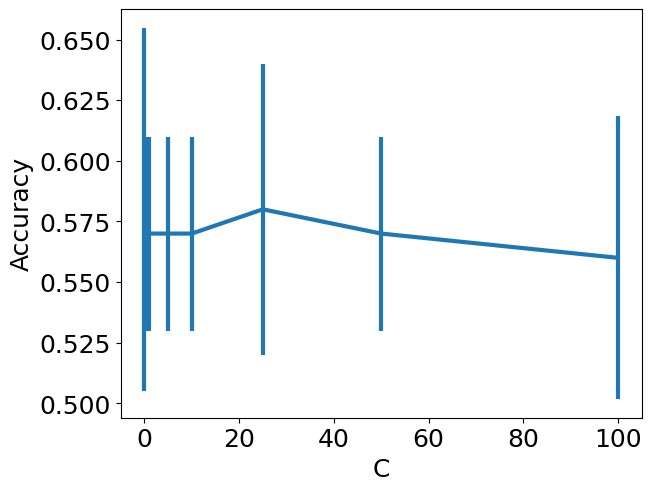

In [26]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Generate some sample data for X and y
X = np.random.rand(100, 2)
y = np.random.choice([0, 1], size=100)

# Split the data into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

# Fit LinearSVC model
model = LinearSVC(C=1.0).fit(Xtrain, ytrain)
preds = model.predict(Xtest)

# Print confusion matrix and classification report for LinearSVC
print("Confusion Matrix for LinearSVC:")
print(confusion_matrix(ytest, preds))

print("Classification Report for LinearSVC:")
print(classification_report(ytest, preds, zero_division=1))  # Set zero_division to 1

# Fit DummyClassifier
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent").fit(Xtrain, ytrain)
ydummy = dummy.predict(Xtest)

# Print confusion matrix and classification report for DummyClassifier
print("Confusion Matrix for DummyClassifier:")
print(confusion_matrix(ytest, ydummy))

print("Classification Report for DummyClassifier:")
print(classification_report(ytest, ydummy, zero_division=1))  # Set zero_division to 1

mean_error = []
std_error = []
C_range = [0.01, 0.1, 1, 5, 10, 25, 50, 100]

for C in C_range:
    model = LinearSVC(C=C)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # Use 'accuracy' for scoring
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())

plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
plt.errorbar(C_range, mean_error, yerr=std_error, linewidth=3)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()



ROC Curve

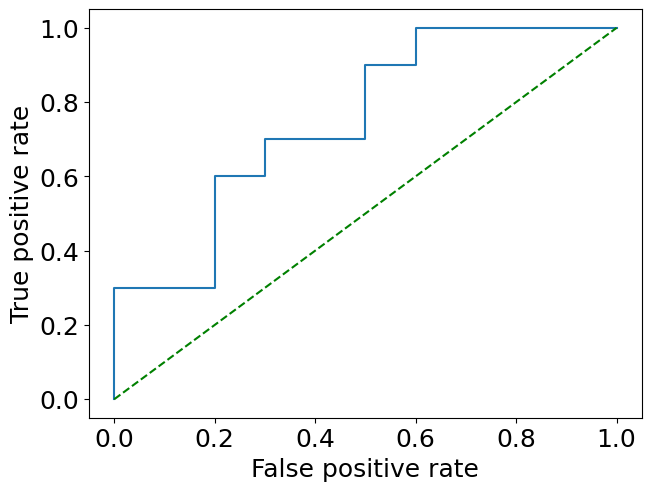

In [27]:
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
model = LinearSVC(C=1.0).fit(Xtrain, ytrain)
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,model.decision_function(Xtest))
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], color='green',linestyle='--')
plt.show()

k-Nearest Neighbour (kNN) Classifier Code

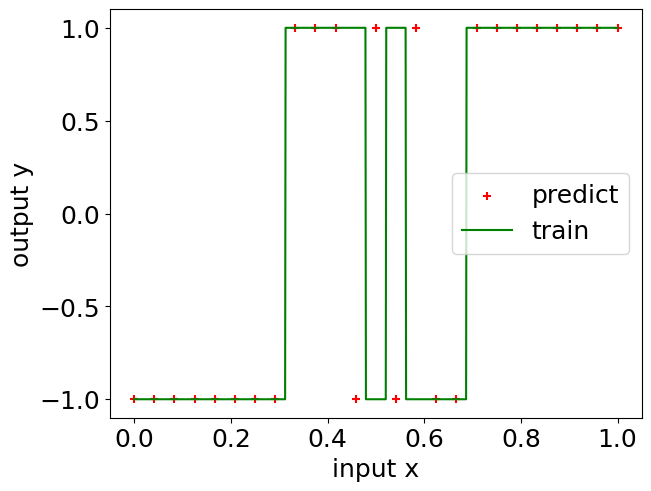

In [28]:
m = 25
Xtrain = np.linspace(0.0,1.0,num=m)
ytrain = np.sign(Xtrain-0.5+np.random.normal(0,0.2,m))
Xtrain = Xtrain.reshape(-1, 1)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3,weights='uniform').fit(Xtrain, ytrain)

Xtest=np.linspace(0.0,1.0,num=1000).reshape(-1, 1)
ypred = model.predict(Xtest)
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.plot(Xtest, ypred, color='green')
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(["predict","train"])
plt.show()

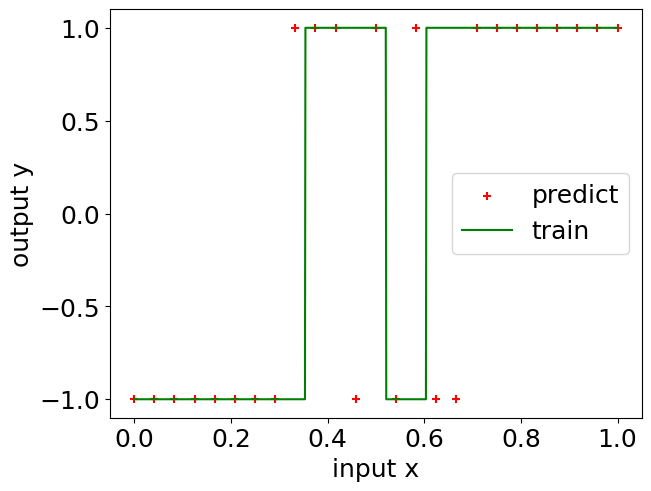

In [29]:

model = KNeighborsClassifier(n_neighbors=7,weights='uniform').fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.plot(Xtest, ypred, color='green')
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(["predict","train"])
plt.show()

k-Nearest Neighbour (kNN) Regression Code

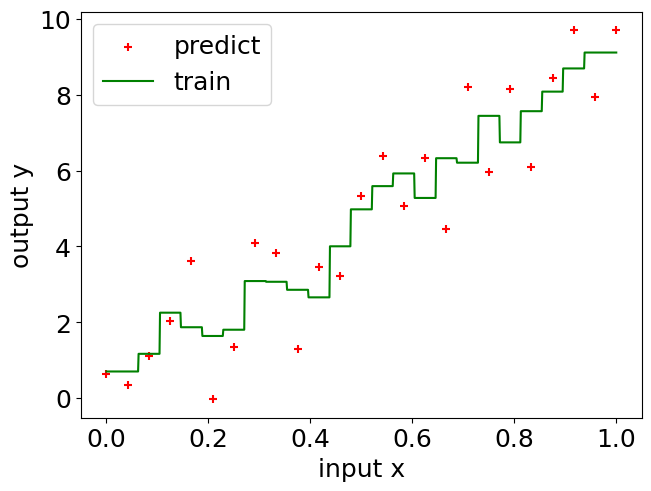

In [30]:
m = 25
Xtrain = np.linspace(0.0,1.0,num=m)
ytrain = 10*Xtrain + np.random.normal(0.0,1.0,m)
Xtrain = Xtrain.reshape(-1, 1)
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3,weights='uniform').fit(Xtrain, ytrain)
Xtest=np.linspace(0.0,1.0,num=1000).reshape(-1, 1)
ypred = model.predict(Xtest)
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.plot(Xtest, ypred, color='green')
plt.xlabel("input x"); plt.ylabel("output y"); plt.legend(["predict","train"])
plt.show()

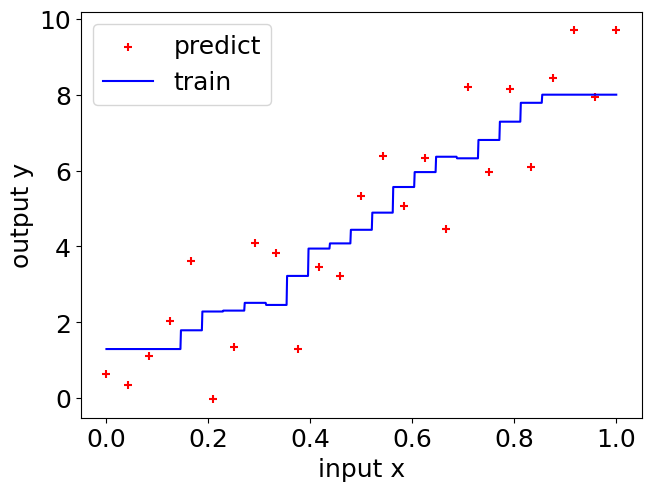

In [31]:
model2 = KNeighborsRegressor(n_neighbors=7,weights='uniform').fit(Xtrain, ytrain)
ypred2 = model2.predict(Xtest)
plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.plot(Xtest, ypred2, color='blue')
plt.xlabel("input x"); plt.ylabel("output y"); plt.legend(["predict","train"])
plt.show()

k-Nearest Neighbour (kNN) Regression Code (cont)

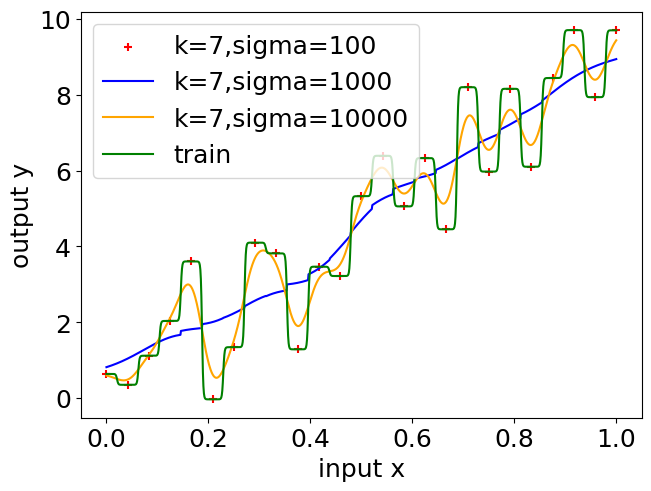

In [32]:
def gaussian_kernel100(distances):
    weights = np.exp(-100*(distances**2))
    return weights/np.sum(weights)

def gaussian_kernel1000(distances):
    weights = np.exp(-1000*(distances**2))
    return weights/np.sum(weights)

def gaussian_kernel10000(distances):
    weights = np.exp(-10000*(distances**2))
    return weights/np.sum(weights)

model2 = KNeighborsRegressor(n_neighbors=7,weights=gaussian_kernel100).fit(Xtrain, ytrain)
ypred2 = model2.predict(Xtest)
model3 = KNeighborsRegressor(n_neighbors=7,weights=gaussian_kernel1000).fit(Xtrain, ytrain)
ypred3 = model3.predict(Xtest)
model4 = KNeighborsRegressor(n_neighbors=7,weights=gaussian_kernel10000).fit(Xtrain, ytrain)
ypred4 = model4.predict(Xtest)

plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.plot(Xtest, ypred2, color='blue')
plt.plot(Xtest, ypred3, color='orange')
plt.plot(Xtest, ypred4, color='green')
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(["k=7,sigma=100","k=7,sigma=1000","k=7,sigma=10000","train"])
plt.show()

Decision Tree code

|--- feature_0 <= 0.48
|   |--- class: -1.0
|--- feature_0 >  0.48
|   |--- class: 1.0



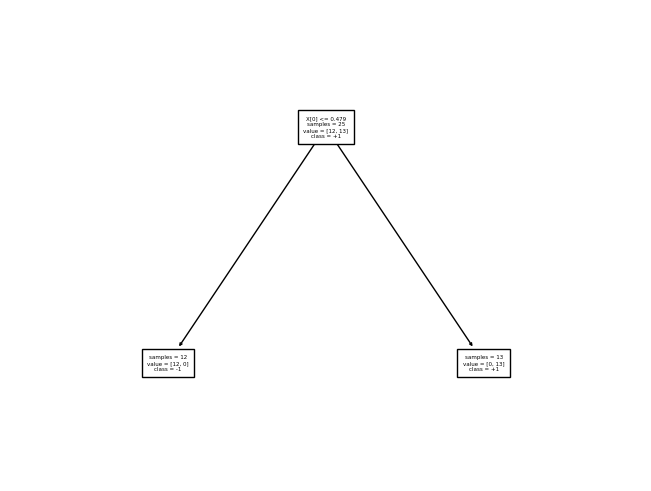

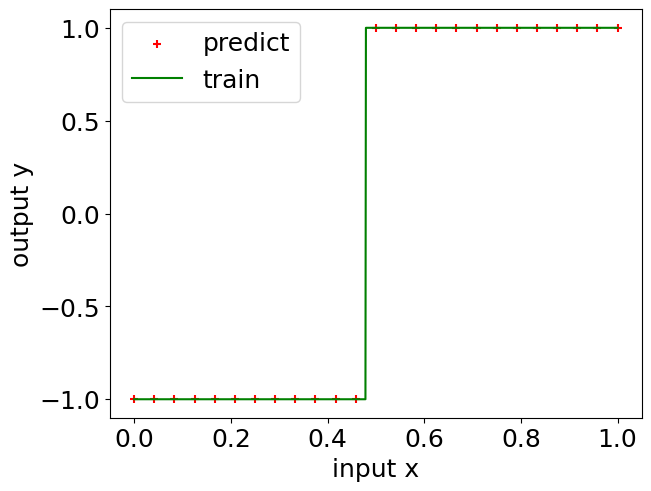

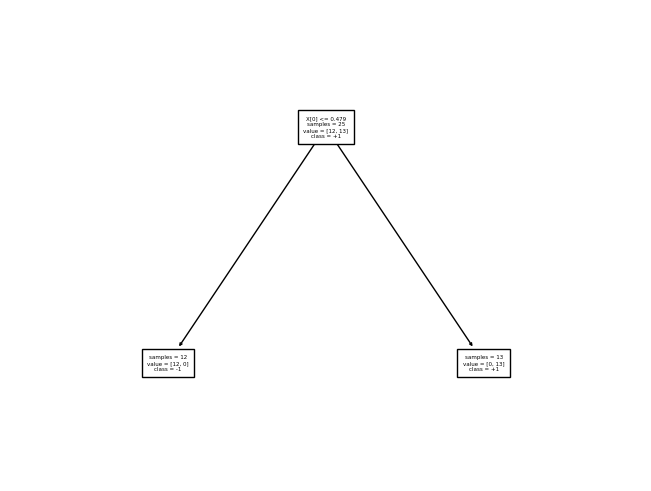

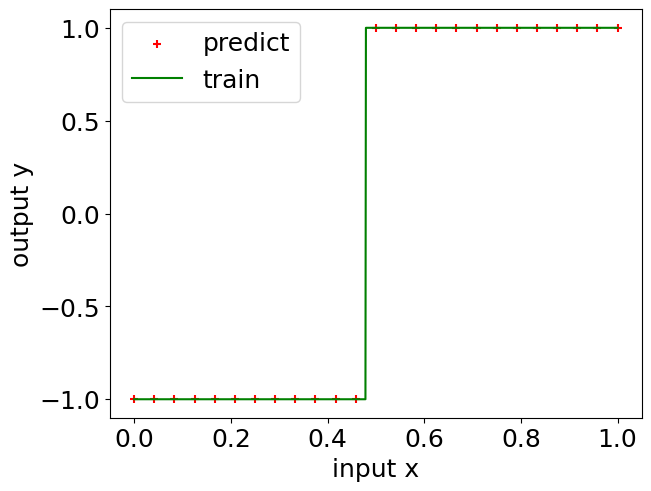

In [33]:
m = 25
Xtrain = np.linspace(0.0,1.0,num=m)
ytrain = np.sign(Xtrain-0.5+np.random.normal(0,0.2,m))
Xtrain = Xtrain.reshape(-1, 1)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(Xtrain, ytrain)

Xtest=np.linspace(0.0,1.0,num=1000).reshape(-1, 1)
ypred = model.predict(Xtest)

from sklearn.tree import export_text
print(export_text(model))
from sklearn.tree import plot_tree
plot_tree(model, fontsize=4, impurity=False, class_names=['-1','+1'])
plt.show()

plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.plot(Xtest, ypred, color='green')
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(["predict","train"])
plt.show()

model = DecisionTreeClassifier(max_depth=1).fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

plot_tree(model, fontsize=4, impurity=False, class_names=['-1','+1'])
plt.show()

plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.plot(Xtest, ypred, color='green')
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(["predict","train"])
plt.show()